In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
time = np.arange(0, 2*np.pi, np.pi/100)

In [3]:
def bpsk(binString):
    amplitude = []
    for i in range(len(binString)):
        if binString[i] == '1': 
            amplitude.append(np.sin(time))
        else : 
            amplitude.append(-np.sin(time))
    return amplitude

In [4]:
carr = np.sin(time)
def bpsk_demod(signal, L):
    d = ''
    for i in range(0, len(signal), L):
        sum = np.sum([signal[i+j]*carr[j] for j in range(L)])
        if sum >= 0:
            d += '1'
        else:
            d += '0'
    return d

In [5]:
def awgn(signal, regsnr):
    noise = np.random.randn(len(signal))
    noise_var = 0.5*10**(-regsnr/10)
    Chan_Noise = noise * np.sqrt(noise_var)
    return Chan_Noise

In [6]:
def NEB(binString, demodBinString):
    return sum(1 for a, b in zip(binString, demodBinString)\
               if a != b) + abs(len(binString) - len(demodBinString))

In [7]:
def normalize(y):
    return y / np.sqrt(np.sum(y**2)/len(y))

In [8]:
def simulate(SNR, file):
    pix = cv2.imread(file)
    height, width, channels = pix.shape
    demod_img = np.zeros((height, width, channels))
    BER = 0
    for i in range(height):
        for j in range(width):
            rgb=pix[i][j]
            binString=''
            for k in np.arange(3):
                binary = bin(rgb[k])[2:].zfill(8)
                binString += binary
            signal = np.array(bpsk(binString)).flatten()
#             %matplotlib inline
#             plt.figure()
#             plt.plot(signal)
#             plt.show() 
            nsignal = awgn(signal, SNR)+signal
#             %matplotlib inline
#             plt.figure()
#             plt.plot(nsignal+signal)
#             plt.show()
            demodBinString = bpsk_demod( nsignal, 200)
            demod_img[i][j] = [int(demodBinString[0:8],2),
                               int(demodBinString[8:16],2),
                               int(demodBinString[16:24],2)]
            BER += NEB(binString,demodBinString)
    
    cv2.imwrite('photo_'+str(SNR)+'.jpg', demod_img)

    img = mpimg.imread(file)
    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(img)
    a.set_title('Before')
    
    img = mpimg.imread('photo_'+str(SNR)+'.jpg')
    a = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(img)
    a.set_title('After')
    
    return BER/(height*width*channels*8)

0.005920138888888889

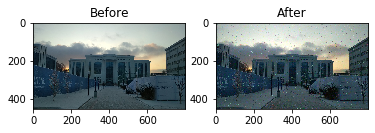

In [9]:
%matplotlib inline
file = 'img.jpg'
simulate(-15,file)

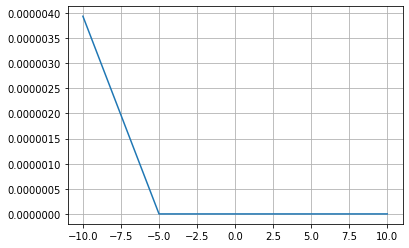

In [10]:
BER = []
for i in range(-10,11,5):
    %matplotlib inline
    BER.append(simulate(i, file))
%matplotlib inline
plt.figure()
plt.grid()
plt.plot(range(-10,11,5), BER)
plt.show()